# Plotting geospatial data

### Week 5 - Discussion section

Date: 2024-10-31

## Set Up 

In [35]:
# Import libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [43]:
# Read in data 
filepath = '/Users/jcsibley/MEDS/eds-220/eds220-2024-sections/data/earthquake_data.csv'
earthquakes = pd.read_csv(filepath)


fp = os.path.join('/Users/jcsibley/MEDS/eds-220/eds220-2024-sections/data/ne_110m_admin_0_countries.shp')
worldmap = gpd.read_file(fp)

# View head of earthquake data 
earthquakes.head(2)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake


In [44]:
# View worldmap 
worldmap.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Filter earthquake 

In [25]:
earthquakes = earthquakes[(earthquakes['mag'] >= 6.5) & (earthquakes['type'] == 'earthquake')]

## Turn lat and long points into a geodataframe

In [26]:
# Using lat and long create coordinates column 
earthquakes['coordinates'] = list(zip(earthquakes.longitude, earthquakes.latitude))

# View that it worked 
earthquakes.head(3)

,time,latitude,longitude,depth,mag,id,place,type,coordinates
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,"(167.24900000000002, -13.8633)"
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,"(-58.9272, 14.6682)"
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,"(82.5864, 35.9053)"


In [27]:
# Transform tuples to Point 

earthquakes['coordinates'] = earthquakes['coordinates'].apply(Point)

In [30]:
# Create geodata frame 

earthquake_gdf = gpd.GeoDataFrame(earthquakes, geometry = 'coordinates', crs='EPSG:4326')

In [31]:
# View the geodataframe 
print(earthquake_gdf.head())

                          time  latitude  longitude   depth  mag          id  \
9062   2014-01-01 16:03:29.000  -13.8633   167.2490  187.00  6.5  usc000lvb5   
12142  2014-02-18 09:27:13.120   14.6682   -58.9272   14.83  6.5  usc000mskt   
14025  2014-02-12 09:19:49.060   35.9053    82.5864   10.00  6.9  usc000mnvj   
15979  2014-02-07 08:40:13.550  -15.0691   167.3721  122.00  6.5  usc000mjye   
17606  2014-02-02 09:26:37.820  -32.9076  -177.8806   44.26  6.5  usc000mfm0   

                                            place        type  \
9062                      32km W of Sola, Vanuatu  earthquake   
12142            172km NNE of Bathsheba, Barbados  earthquake   
14025                   272km ESE of Hotan, China  earthquake   
15979                34km E of Port-Olry, Vanuatu  earthquake   
17606  189km SSE of L'Esperance Rock, New Zealand  earthquake   

                        coordinates  
9062    POINT (167.24900 -13.86330)  
12142    POINT (-58.92720 14.66820)  
14025     POIN

## Plot it 

<Axes: >

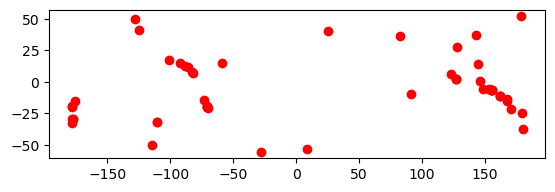

In [32]:
# Simple plot of earthquake dots 

earthquake_gdf.plot(color = 'red')

<Axes: title={'center': 'Earthquakes of magnitude at least 6.5 in 2014'}>

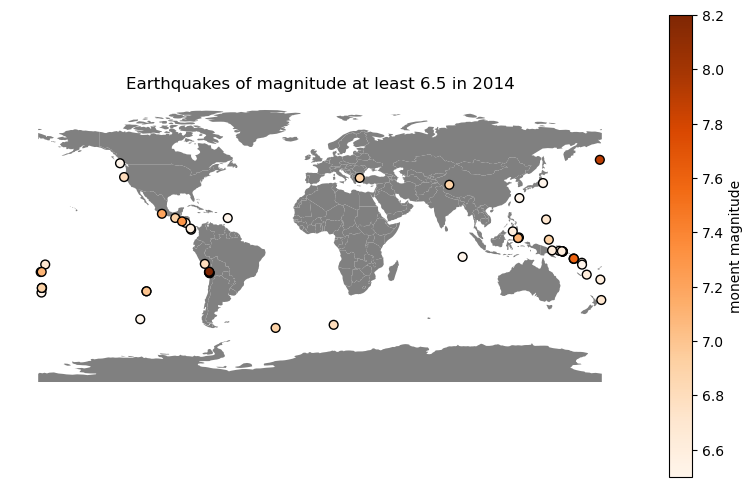

In [47]:
fig, ax=plt.subplots(figsize = (10, 6))

ax.axis('off')

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014', fontsize = 12)

# Add countries 
worldmap.plot(ax = ax,
             color = "gray",
             edgecolor = 'none')

# Add earthquakes 
earthquake_gdf.plot(ax = ax,
                    column = 'mag',
                    legend = True,
                    edgecolor = 'black',
                    markersize = 40,
                    cmap = 'Oranges',
                    legend_kwds = {'label': 'monent magnitude'})